# Heart Disease Detection


<h1 style="font-family: 'poppins'; font-weight: bold; color: Green;">👨‍💻Author: Danish Javaid Meo</h1>

[![Email](https://img.shields.io/badge/Email-Contact%20Me-red?style=for-the-badge&logo=email)](danishjmeo@gmail.com)
[![Kaggle](https://img.shields.io/badge/Kaggle-Profile-blue?style=for-the-badge&logo=kaggle)](https://www.kaggle.com/danishjmeo)
[![GitHub](https://img.shields.io/badge/GitHub-Profile-blue?style=for-the-badge&logo=github)](https://github.com/danishmeo9) 
[![LinkedIn](https://img.shields.io/badge/LinkedIn-Profile-blue?style=for-the-badge&logo=linkedin)](https://www.linkedin.com/in/danish-javaid-4271a8231/)  


## Meta-Data (About Dataset)
## Context
This is a multivariate type of dataset which means providing or involving a variety of separate mathematical or statistical variables, multivariate numerical data analysis. It is composed of 14 attributes which are age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, oldpeak — ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, number of major vessels and Thalassemia. This database includes 76 attributes, but all published studies relate to the use of a subset of 14 of them. The Cleveland database is the only one used by ML researchers to date. One of the major tasks on this dataset is to predict based on the given attributes of a patient that whether that particular person has heart disease or not and other is the experimental task to diagnose and find out various insights from this dataset which could help in understanding the problem more.

### Content
#### Column Descriptions:
* `id` (Unique id for each patient)
* `age` (Age of the patient in years)
* `origin` (place of study)
* `sex` (Male/Female)
* `cp` chest pain type 
  1. typical angina, 
  2. atypical angina, 
  3. non-anginal, 
  4. asymptomatic
* `trestbps` resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
* `chol` (serum cholesterol in mg/dl)
* `fbs` (if fasting blood sugar > 120 mg/dl)
* `restecg` (resting electrocardiographic results)
* -- `Values`: [normal, stt abnormality, lv hypertrophy]
* `thalach`: maximum heart rate achieved
* `exang`: exercise-induced angina (True/ False)
* `oldpeak`: ST depression induced by exercise relative to rest
* `slope`: the slope of the peak exercise ST segment
* `ca`: number of major vessels (0-3) colored by fluoroscopy
* `thal`: [normal; fixed defect; reversible defect]
* `num`: the predicted attribute

### Acknowledgements
#### Creators:
* Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
* University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
* University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
* V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.
#### Relevant Papers:
* Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J., Sandhu, S., Guppy, K., Lee, S., & Froelicher, V. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. American Journal of Cardiology, 64,304--310. 
* David W. Aha & Dennis Kibler. "Instance-based prediction of heart-disease presence with the Cleveland database." 
* Gennari, J.H., Langley, P, & Fisher, D. (1989). Models of incremental concept formation. Artificial Intelligence, 40, 11--61.
#### Citation Request:
The authors of the databases have requested that any publications resulting from the use of the data include the names of the principal investigator responsible for the data collection at each institution. 

**They would be:**

* Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
* University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
* University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
* V.A. Medical Center, Long Beach and Cleveland Clinic Foundation:Robert Detrano, M.D., Ph.D.

# Import Libraries

In [1]:
# import libraries

# 1. to handle the data
import pandas as pd
import numpy as np

# to visualize the dataset
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# To preprocess the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer
# import iterative imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# machine learning
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
#for classification tasks
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor
from xgboost import XGBClassifier
#metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error, mean_squared_error, r2_score

# ignore warnings   
import warnings
warnings.filterwarnings('ignore')

#  Load Dataset

In [2]:

### Load the Dataset
# way 1
# load the data from csv file through from your pc
df = pd.read_csv('/kaggle/input/heart-disease-data/heart_disease_uci.csv')
df.head() # df.head is used for viewing data in pandas

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


# Exploartory Data Analysis

In [3]:
df.info()  # Exploring hte data type of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [4]:
# data shape
df.shape

(920, 16)

# Explore each column

## 1 - Id column

In [5]:
# id column
df['id'].min(),df['id'].max()

(1, 920)

- we can see id column is showing index number of each row in the dataset because showing nams may raised privacy issues for individuals 

## 2 Age column

In [6]:
# Age columns
df['age'].describe()

count    920.000000
mean      53.510870
std        9.424685
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: age, dtype: float64

- The minimumage of having heart disease is 28 years

### hist plot

<Axes: xlabel='age', ylabel='Count'>

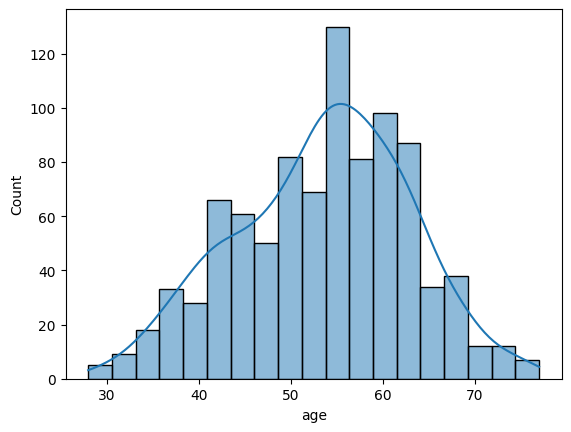

In [7]:
sns.histplot(df['age'],kde=True)

Mean: 53.51086956521739
Median: 54.0
Mode: 54


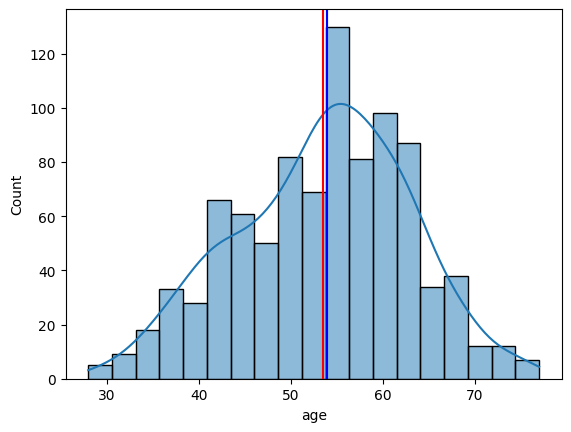

In [8]:
# plot the mean median of age colunm
# plot the mean, median and mode of age column using sns
sns.histplot(df['age'], kde=True)
plt.axvline(df['age'].mean(), color='red')
plt.axvline(df['age'].median(), color='green')
plt.axvline(df['age'].mode()[0], color='blue')

# print the value of mean, median and mode of age column
print('Mean:', df['age'].mean())
print('Median:', df['age'].median())
print('Mode:', df['age'].mode()[0])

# People aged between 50 and 60 affected with heart disease

In [9]:
count = df[(df["age"] > 50) & (df["age"] < 60)].shape[0]
print("Number of people aged between 50 and 60:", count)


Number of people aged between 50 and 60: 350


In [10]:


# Calculate percentage
percentage = (count/ 920) * 100

print(f"Percentage of people aged between 50 and 60: {percentage:.2f}%")


Percentage of people aged between 50 and 60: 38.04%


## 3 Gender 

In [11]:
fig=px.histogram(data_frame=df,x='age',color='sex')
fig.show()

- Most of males and females get heart disease at the age of 54-55 years

In [12]:
# Let's count values according to sex 
df['sex'].value_counts()

sex
Male      726
Female    194
Name: count, dtype: int64

- we can see males are 274% more than females and chances of heart disease are more in males

In [13]:
# Let's find percentage of male and females  in dataset
male_count=726
female_count=194
total_count=male_count+female_count
male_percentage=(male_count/total_count)*100
female_percentage=(female_count/total_count)*100
print("Percentage of males in dataset:",male_percentage)
print("Percentage of females in dataset:",female_percentage)

difference_percentage = ((male_count - female_count) / female_count) * 100
print(f"Males are {difference_percentage:.2f}% more than females in the data.")

Percentage of males in dataset: 78.91304347826087
Percentage of females in dataset: 21.086956521739133
Males are 274.23% more than females in the data.


### Value count of age column grouping by sex

In [14]:
df.groupby('sex')['age'].value_counts()

sex     age
Female  54     15
        51     11
        62     10
        43      9
        48      9
               ..
Male    77      2
        28      1
        31      1
        33      1
        76      1
Name: count, Length: 91, dtype: int64

In [15]:
df.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

## 4 Dataset column 

- This column contains four areas from where the data is collected

In [16]:
df['dataset'].unique()


array(['Cleveland', 'Hungary', 'Switzerland', 'VA Long Beach'],
      dtype=object)

In [17]:
df['dataset'].value_counts()

dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64

- data set column contains four areas from where the data is collected we can see most of the data is from cleveland .
- The whole data is collected from 4 areas

In [18]:
# Make a value count column form data set column grouped by sex
df.groupby('dataset')['sex'].value_counts()

dataset        sex   
Cleveland      Male      207
               Female     97
Hungary        Male      212
               Female     81
Switzerland    Male      113
               Female     10
VA Long Beach  Male      194
               Female      6
Name: count, dtype: int64

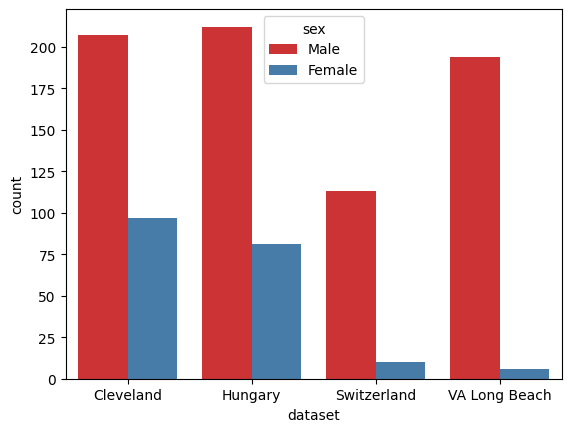

In [19]:
 #Count plot for dataset column based on gender
sns.countplot(x='dataset', data=df,hue='sex',palette='Set1')
plt.show()

In [20]:
# using plotly
fig=px.histogram(data_frame=df,x='dataset',color='sex')
fig.show()

- The  highest number of males in this dataset are from hungry 212 males and highest number of females are from Cleveland 97 females.
- The lowest number of male in this dataset are from switzerland 113 males and lowest number of females are from VA Long Beach 6 females.

In [21]:
# Let's mak eplot based on age and dataset column
fig=px.histogram(data_frame=df,x='age',color='dataset')
fig.show()

# Let's see mean median mode plot based on age and dataset column
print(df.groupby('dataset')['age'].agg(['mean', 'median']))
print(df.groupby('dataset')['age'].agg(pd.Series.mode))

                    mean  median
dataset                         
Cleveland      54.351974    55.5
Hungary        47.894198    49.0
Switzerland    55.317073    56.0
VA Long Beach  59.350000    60.0
dataset
Cleveland              58
Hungary                54
Switzerland            61
VA Long Beach    [62, 63]
Name: age, dtype: object


#### OUTPUPT:

In [22]:
df.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

### 'cp(chest pain)' column:

In [23]:
df['cp'].head()

0     typical angina
1       asymptomatic
2       asymptomatic
3        non-anginal
4    atypical angina
Name: cp, dtype: object

In [24]:
df['cp'].value_counts()

cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64

In [25]:
# Data for chest pain types
labels = ["Asymptomatic", "Non-Anginal", "Atypical Angina", "Typical Angina"]
values = [496, 204, 174, 46]

# Create pie chart
fig = px.pie(names=labels, values=values, title="Distribution of Chest Pain Types", hole=0.3)

# Show figure
fig.show()


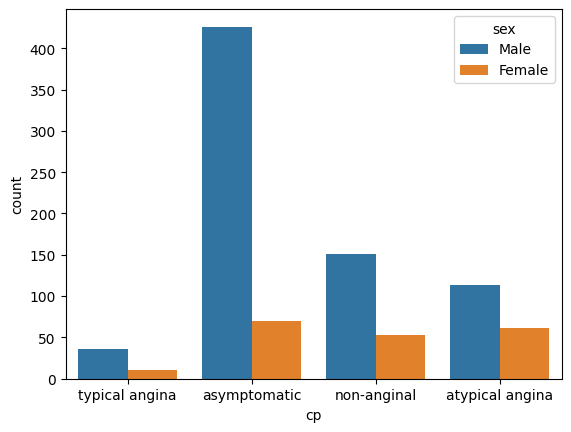

In [26]:
# count plot for sex column
sns.countplot(x='cp', data=df,hue='sex')
plt.show()

- all types of chest pain are present in both males and females. but males are more affected than females but one point is that over dataset has less females and more males

<Axes: xlabel='cp', ylabel='count'>

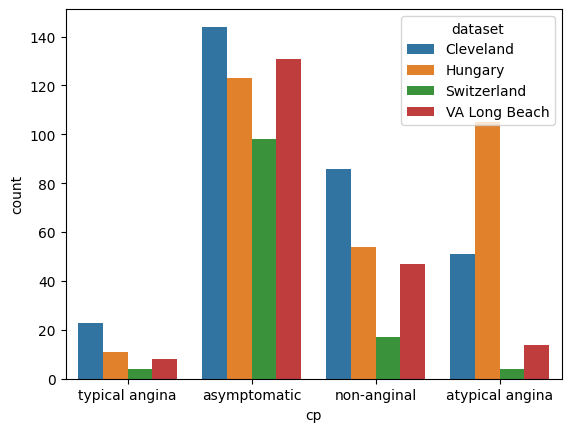

In [27]:
# let's see chest pain type according to area (dataset column)
sns.countplot(x='cp', data=df,hue='dataset')


Cleveland has the highest count, followed closely by VA Long Beach and Hungary, while Switzerland has the lowest.
all 4 areas has patients with asymptomatic condition
This suggests that silent heart disease is a significant concern

In [28]:
# draw the plot of age column grouped by cp column using plotly
fig = px.histogram(data_frame=df, x='age', color='cp')
fig.show()

- It is clear that most of the   patients having heart disease do not have any chest pain.which is about 53% 496/920.

- A significant portion  204 of individuals experience chest pain that is not related to angina or heart disease, indicating that other conditions (like musculoskeletal or gastrointestinal issues) might be causing discomfort.

- 20 % individuals have Atypical Angina which not directly linked with symptoms of angina but can linked with heart disease.
- 5 % typical angina patients

In [29]:
df.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

## Let's Explore the trestbps(resting blood pressure) column

| Category                 | Systolic BP (mmHg) | Interpretation |
|-------------------------|------------------|---------------|
| **Normal**              | < 120            | Healthy blood pressure |
| **Elevated**            | 120 - 129        | Increased risk, lifestyle changes recommended |
| **Hypertension Stage 1** | 130 - 139        | Mild high blood pressure, may require medication |
| **Hypertension Stage 2** | 140 - 180        | Moderate to severe high blood pressure |
| **Hypertensive Crisis**  | > 180            | Dangerously high, requires immediate medical attention |


In [30]:
# Let's see minimum max mean median mode of trestbps column
df['trestbps'].describe()

count    861.000000
mean     132.132404
std       19.066070
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

In [31]:
# we have to see missing values
df['trestbps'].isnull().sum()

59

### Filling missing values using ML

In [32]:

# create an object of iterative imputer
imputer_1 = IterativeImputer(max_iter=10, random_state=42)

# fit the imputer on trestbps column
imputer_1.fit(df[['trestbps']])
# transform the data
df['trestbps'] = imputer_1.transform(df[['trestbps']])

# check the missing values in trestbps column
print(f"Missing values in trestbps column: {df['trestbps'].isnull().sum()}")

Missing values in trestbps column: 0


Category_bps
Hypertension Stage 2    303
Hypertension Stage 1    236
Elevated                211
Normal                  162
Hypertensive Crisis       8
Name: count, dtype: int64


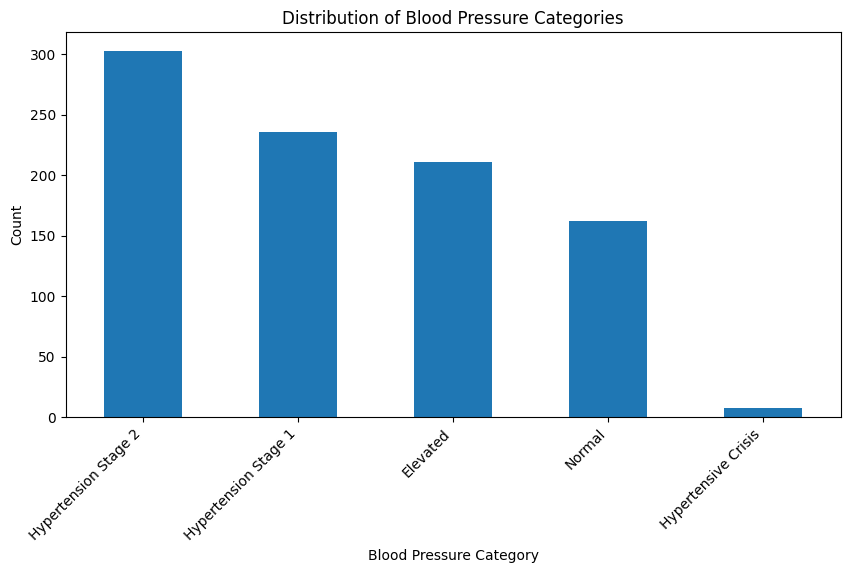

In [33]:
# Define function to classify BP
def classify_bp(value):
    if value < 120:
        return "Normal"
    elif 120 <= value <= 129:
        return "Elevated"
    elif 130 <= value <= 139:
        return "Hypertension Stage 1"
    elif 140 <= value <= 180:
        return "Hypertension Stage 2"
    elif 180 < value <= 200:
        return "Hypertensive Crisis"
    return "Unknown"

# Apply classification
df['Category_bps'] = df['trestbps'].apply(classify_bp)

# Compute and display frequency
print(df['Category_bps'].value_counts())


grouped_freq = df['Category_bps'].value_counts()

# Plot bar chart
plt.figure(figsize=(10, 5))
grouped_freq.plot(kind='bar')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.xlabel("Blood Pressure Category")
plt.ylabel("Count")
plt.title("Distribution of Blood Pressure Categories")
plt.show()

<Axes: xlabel='Category_bps', ylabel='count'>

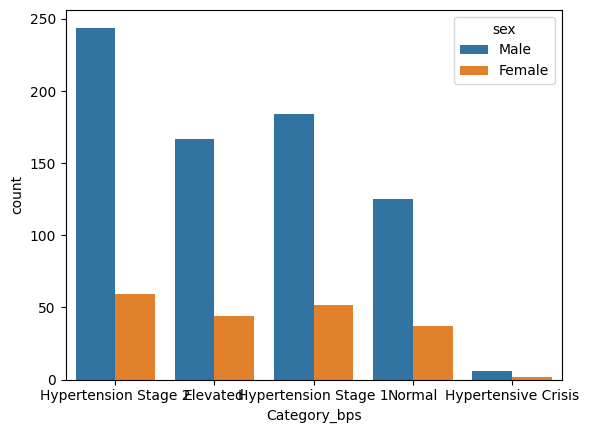

In [34]:
# let's see bps accoridng to gender
sns.countplot(x='Category_bps', data=df,hue='sex')

- `we can see at the time of admission in hospital most patients have bps between 140-180 which is hypertension stage 2, which is a serious condition that needs immediate attention. If we very critical condition we found that 8 patients bps crossed 180 which is alarming and we can see in all cases males are most affected than females`

<Axes: xlabel='trestbps', ylabel='Count'>

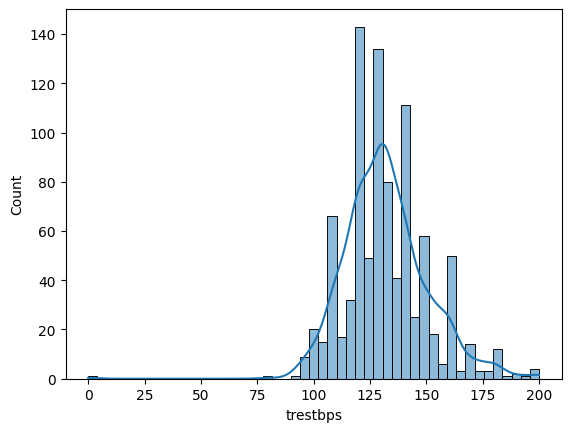

In [35]:
sns.histplot(df['trestbps'],kde=True)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            920 non-null    int64  
 1   age           920 non-null    int64  
 2   sex           920 non-null    object 
 3   dataset       920 non-null    object 
 4   cp            920 non-null    object 
 5   trestbps      920 non-null    float64
 6   chol          890 non-null    float64
 7   fbs           830 non-null    object 
 8   restecg       918 non-null    object 
 9   thalch        865 non-null    float64
 10  exang         865 non-null    object 
 11  oldpeak       858 non-null    float64
 12  slope         611 non-null    object 
 13  ca            309 non-null    float64
 14  thal          434 non-null    object 
 15  num           920 non-null    int64  
 16  Category_bps  920 non-null    object 
dtypes: float64(5), int64(3), object(9)
memory usage: 122.3+ KB


- we can see we have columns with missing values but havung different data types.

<span style="color: yellow; font-size: 350%; font-weight: bold;">Dealing with missing values</span>

In [37]:
categorical_cols = ['thal', 'ca', 'slope', 'exang', 'restecg','fbs', 'cp', 'sex', 'num']
bool_cols = ['fbs', 'exang']
numeric_cols = ['oldpeak', 'thalch', 'chol', 'trestbps', 'age']

In [38]:
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)
missing_data_cols = df.isnull().sum()[df.isnull().sum() > 0].index.tolist()
missing_data_cols 

['chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

In [39]:
# define the function to impute the missing values in thal column

def impute_categorical_missing_data(passed_col):
    
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    if passed_col in bool_cols:
        y = label_encoder.fit_transform(y)
        
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_classifier = RandomForestClassifier()

    rf_classifier.fit(X_train, y_train)

    y_pred = rf_classifier.predict(X_test)

    acc_score = accuracy_score(y_test, y_pred)

    print("The feature '"+ passed_col+ "' has been imputed with", round((acc_score * 100), 2), "accuracy\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_classifier.predict(X)
        if passed_col in bool_cols:
            df_null[passed_col] = df_null[passed_col].map({0: False, 1: True})
        else:
            pass
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

def impute_continuous_missing_data(passed_col):
    
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])
    
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_regressor = RandomForestRegressor()

    rf_regressor.fit(X_train, y_train)

    y_pred = rf_regressor.predict(X_test)

    # print("MAE =", mean_absolute_error(y_test, y_pred), "\n")
    # print("RMSE =", mean_squared_error(y_test, y_pred, squared=False), "\n")
    print("R2 =", r2_score(y_test, y_pred), "\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_regressor.predict(X)
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

In [40]:
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)

ca         611
thal       486
slope      309
fbs         90
oldpeak     62
thalch      55
exang       55
chol        30
restecg      2
dtype: int64

In [41]:
# remove warning
import warnings
warnings.filterwarnings('ignore')

# impute missing values using our functions
for col in missing_data_cols:
    print("Missing Values", col, ":", str(round((df[col].isnull().sum() / len(df)) * 100, 2))+"%")
    if col in categorical_cols:
        df[col] = impute_categorical_missing_data(col)
    elif col in numeric_cols:
        df[col] = impute_continuous_missing_data(col)
    else:
        pass

Missing Values chol : 3.26%
R2 = 0.6770705739420522 

Missing Values fbs : 9.78%
The feature 'fbs' has been imputed with 79.52 accuracy

Missing Values restecg : 0.22%
The feature 'restecg' has been imputed with 68.48 accuracy

Missing Values thalch : 5.98%
R2 = 0.3229651034950376 

Missing Values exang : 5.98%
The feature 'exang' has been imputed with 78.61 accuracy

Missing Values oldpeak : 6.74%
R2 = 0.41589105374835744 

Missing Values slope : 33.59%
The feature 'slope' has been imputed with 66.67 accuracy

Missing Values ca : 66.41%
The feature 'ca' has been imputed with 64.52 accuracy

Missing Values thal : 52.83%
The feature 'thal' has been imputed with 71.26 accuracy



In [42]:
df.isnull().sum()

id              0
age             0
sex             0
dataset         0
cp              0
trestbps        0
chol            0
fbs             0
restecg         0
thalch          0
exang           0
oldpeak         0
slope           0
ca              0
thal            0
num             0
Category_bps    0
dtype: int64

---

<span style="color: green; font-size: 350%; font-weight: bold;">Dealing with Outliers</span>

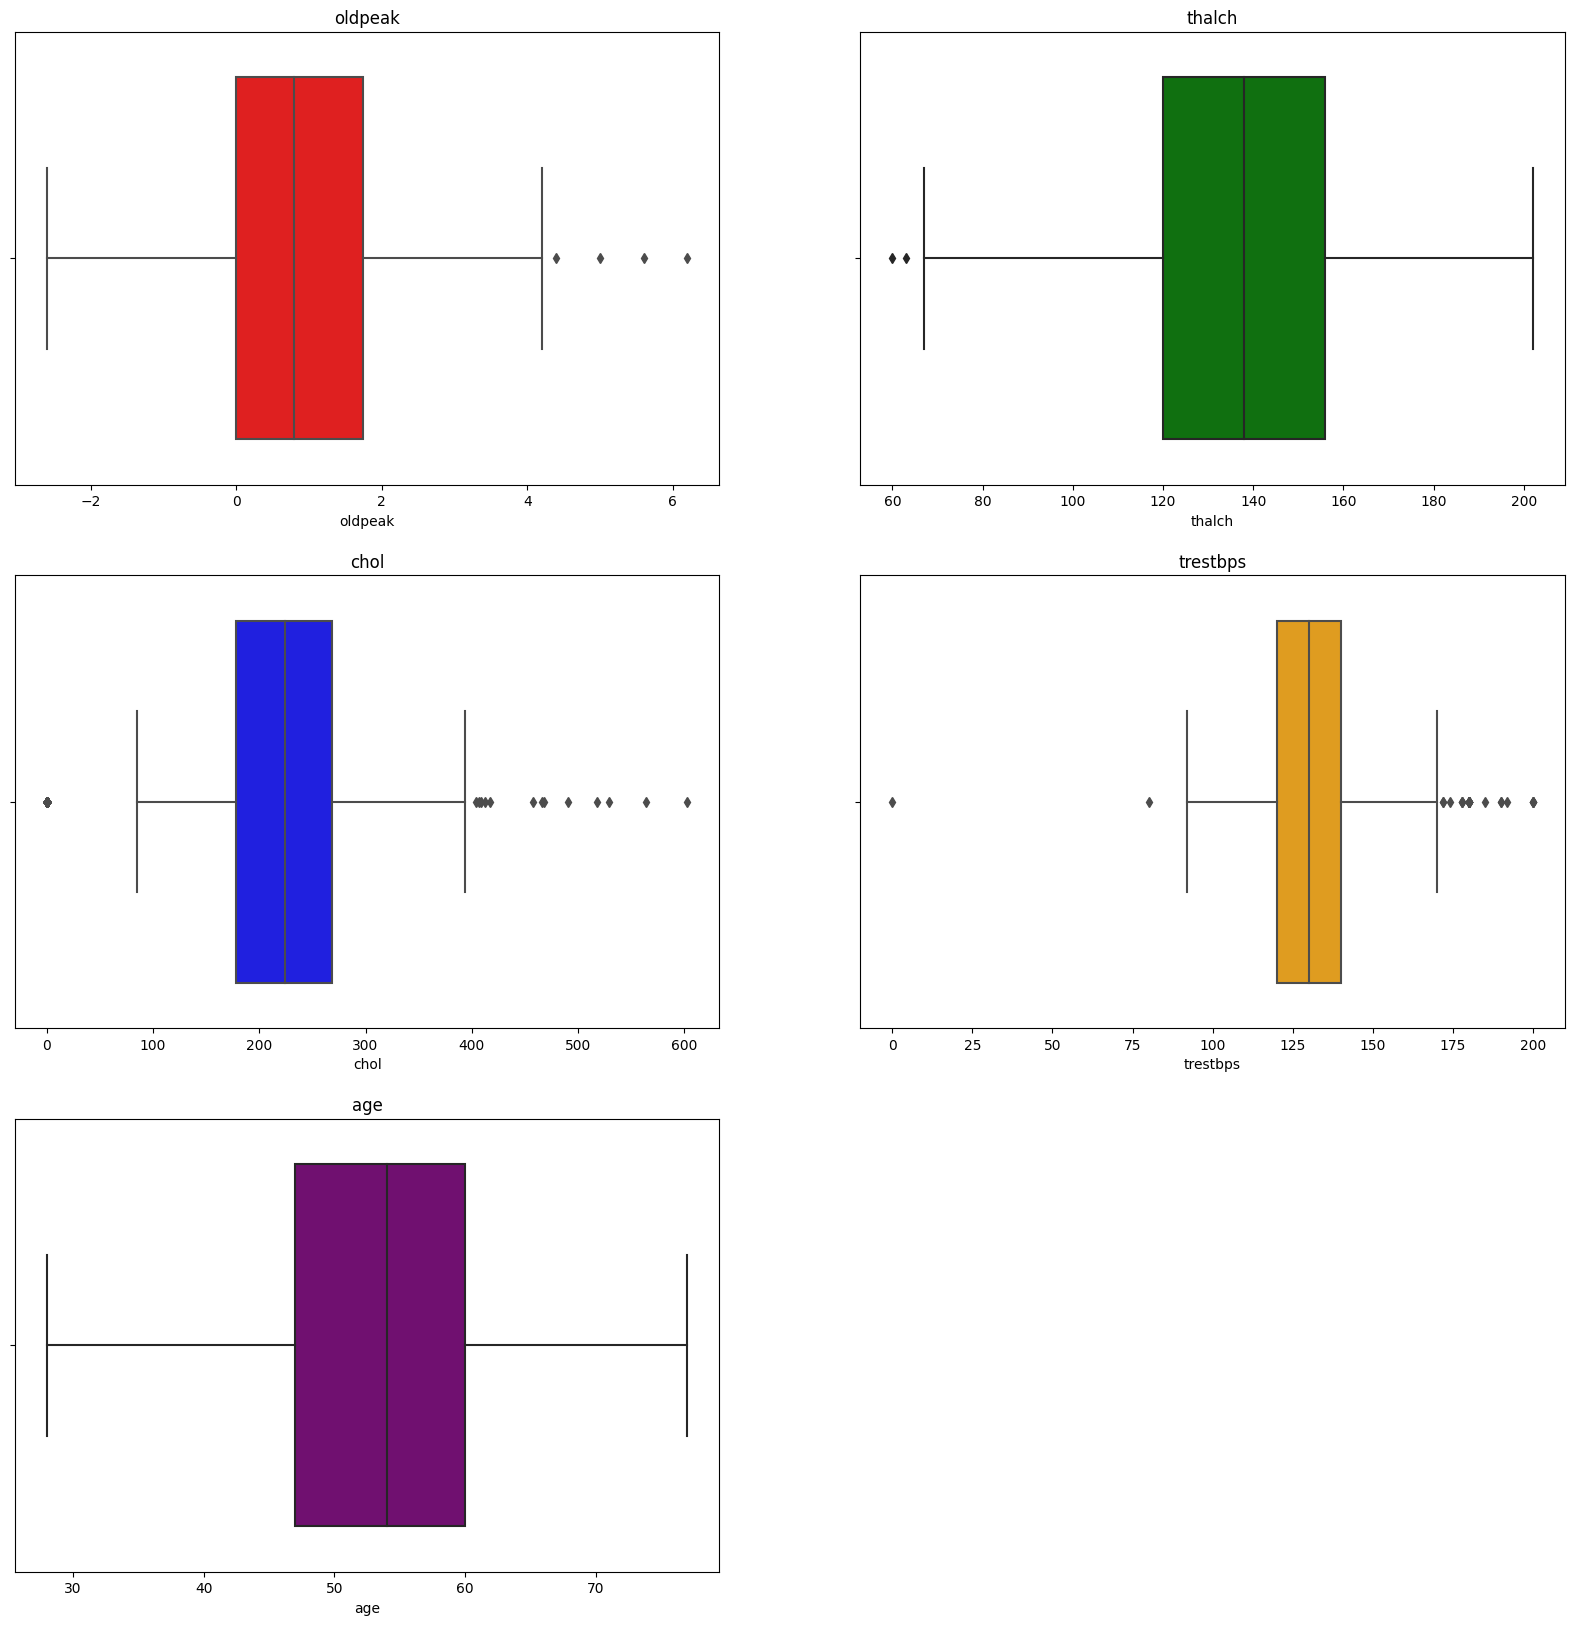

In [43]:
# create box plots for all numeric columns using for loop and subplot
plt.figure(figsize=(20, 20))

colors = ['red', 'green', 'blue', 'orange', 'purple']

for i, col in enumerate(numeric_cols):
    plt.subplot(3, 2, i+1)
    sns.boxplot(x=df[col], color=colors[i])
    plt.title(col)
plt.show()

In [44]:
# make box plots of all the numeric columns using for loop and plotly
fig = px.box(data_frame=df, y='age')
fig.show()

fig = px.box(data_frame=df, y='trestbps')
fig.show()

fig = px.box(data_frame=df, y='chol')
fig.show()

fig = px.box(data_frame=df, y='thalch')
fig.show()

fig = px.box(data_frame=df, y='oldpeak')
fig.show()

In [45]:
# print the row of trestbps is 0 in df
df[df['trestbps'] == 0]

# remove the row where trestbps is 0
df = df[df['trestbps'] != 0]

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 919 entries, 0 to 919
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            919 non-null    int64  
 1   age           919 non-null    int64  
 2   sex           919 non-null    object 
 3   dataset       919 non-null    object 
 4   cp            919 non-null    object 
 5   trestbps      919 non-null    float64
 6   chol          919 non-null    float64
 7   fbs           919 non-null    object 
 8   restecg       919 non-null    object 
 9   thalch        919 non-null    float64
 10  exang         919 non-null    object 
 11  oldpeak       919 non-null    float64
 12  slope         919 non-null    object 
 13  ca            919 non-null    float64
 14  thal          919 non-null    object 
 15  num           919 non-null    int64  
 16  Category_bps  919 non-null    object 
dtypes: float64(5), int64(3), object(9)
memory usage: 129.2+ KB


# Let's see chol column

In [47]:
df['chol'].describe()

count    919.000000
mean     200.809935
std      109.242149
min        0.000000
25%      178.500000
50%      224.000000
75%      268.000000
max      603.000000
Name: chol, dtype: float64

In [48]:
# Let'see the distribution of chol column
fig = px.histogram(data_frame=df, x='chol')
fig.show()

In [49]:
df['chol'] = df['chol'].replace(0, df.loc[df['chol'] != 0, 'chol'].mean())



In [50]:
# Let'see the distribution of chol column
fig = px.histogram(data_frame=df, x='chol')
fig.show()

- we can see the distribution of chol column is normal now because mdeically it is not realistic that having chol level 0 so we replaced the 0 with mean

# let's see fbs colums

In [51]:
df['fbs'].value_counts()

fbs
False    781
True     138
Name: count, dtype: int64

- we can see that the huge amount of people do not have fasting blood sugar above than 126 it means people admitted in hospitals do not have diabetes

# Let's see restecg column

In [52]:
df['restecg'].value_counts()

restecg
normal              552
lv hypertrophy      188
st-t abnormality    179
Name: count, dtype: int64

In [53]:
# is there any  connection of  restecg with gender
fig = px.histogram(data_frame=df, x='restecg', color='sex')
fig.show()

 # Let's see num (target)column
 

In [54]:
df['num'].unique()

array([0, 2, 1, 3, 4])

The Target Column is `num` which is the predicted attribute. We will use this column to predict the heart disease. 
The unique values in this column are: [0, 1, 2, 3, 4], which states that there are 5 types of heart diseases.
* `0 = no heart disease`
* `1 = mild heart disease`
* `2 = moderate heart disease `
* `3 = severe heart disease`
* `4 = critical heart disease `

<span style="color: yellow; font-size: 350%; font-weight: bold;">Machine Learning</span>

---

# Label Encoding

In [55]:
# # split the data into X and y
X = df.drop('num', axis=1)
y = df['num']

# encode X data using separate label encoder for all categorical columns and save it for inverse transform
# Task: Separate Encoder for all cat and object columns and inverse transform at the end

label_encoder = LabelEncoder()

for col in X.columns:
    if X[col].dtype == 'object' or X[col].dtype == 'category':
        X[col] = label_encoder.fit_transform(X[col])
    else:
        pass

# # split the data into train and test
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [56]:
# import pandas as pd
# from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# # Assume X is your feature DataFrame
# X = X.drop(columns=['id'])  # Drop 'id' since it's not useful

# # Define categorical columns (modify if needed)
# categorical_cols = ['sex', 'dataset', 'cp', 'restecg', 'exang', 'slope', 'thal', 'fbs']

# # Store label encoders for inverse transformation later
# label_encoders = {}

# # Apply Label Encoding to categorical columns
# for col in categorical_cols:
#     le = LabelEncoder()  # Create a new instance for each column
#     X[col] = le.fit_transform(X[col])  # Transform categorical values
#     label_encoders[col] = le  # Store the encoder for inverse transformation

# # Select numerical columns for normalization
# numerical_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']

# # Apply Min-Max Scaling (normalize between 0 and 1)
# scaler = MinMaxScaler()
# X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# # Print first few rows
# print(X.head())


In [57]:
X.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal',
       'Category_bps'],
      dtype='object')

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 919 entries, 0 to 919
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            919 non-null    int64  
 1   age           919 non-null    int64  
 2   sex           919 non-null    object 
 3   dataset       919 non-null    object 
 4   cp            919 non-null    object 
 5   trestbps      919 non-null    float64
 6   chol          919 non-null    float64
 7   fbs           919 non-null    object 
 8   restecg       919 non-null    object 
 9   thalch        919 non-null    float64
 10  exang         919 non-null    object 
 11  oldpeak       919 non-null    float64
 12  slope         919 non-null    object 
 13  ca            919 non-null    float64
 14  thal          919 non-null    object 
 15  num           919 non-null    int64  
 16  Category_bps  919 non-null    object 
dtypes: float64(5), int64(3), object(9)
memory usage: 129.2+ KB


In [59]:
X.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,Category_bps
0,1,63,1,0,3,145.0,233.0,1,0,150.0,0,2.3,0,0.0,0,2
1,2,67,1,0,0,160.0,286.0,0,0,108.0,1,1.5,1,3.0,1,2
2,3,67,1,0,0,120.0,229.0,0,0,129.0,1,2.6,1,2.0,2,0
3,4,37,1,0,2,130.0,250.0,0,1,187.0,0,3.5,0,0.0,1,1
4,5,41,0,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0.0,1,1


# Scaling

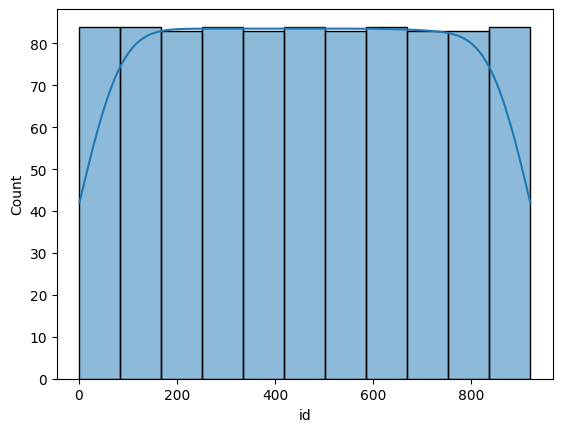

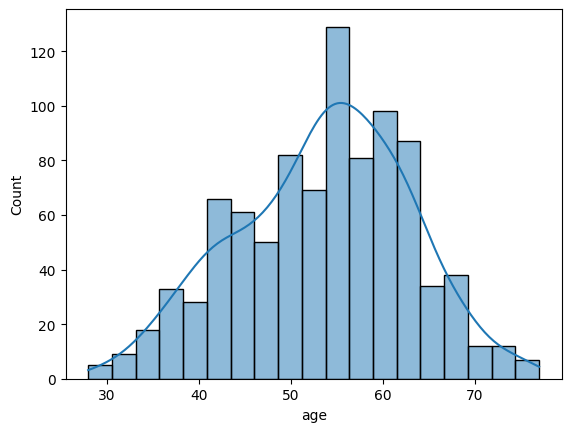

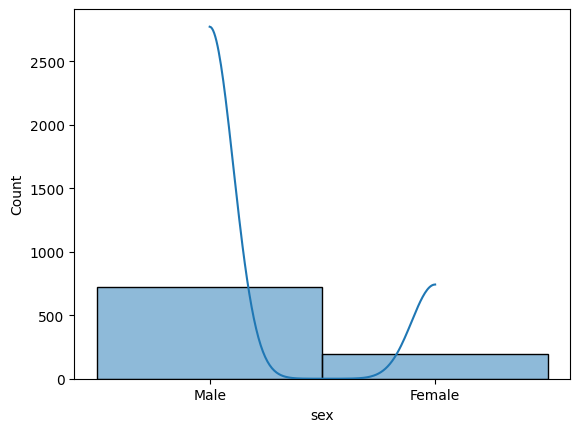

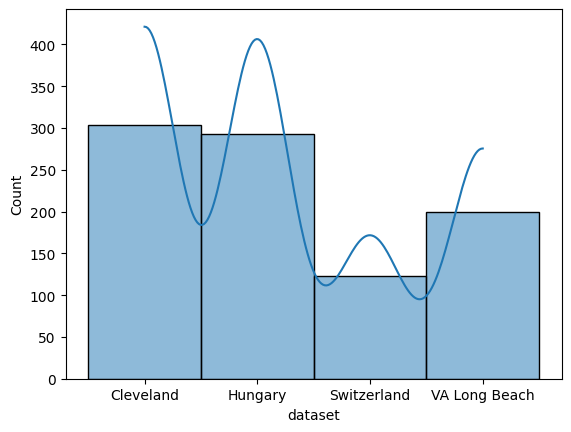

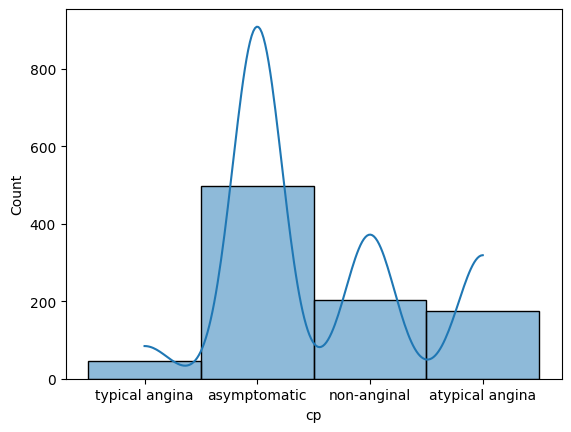

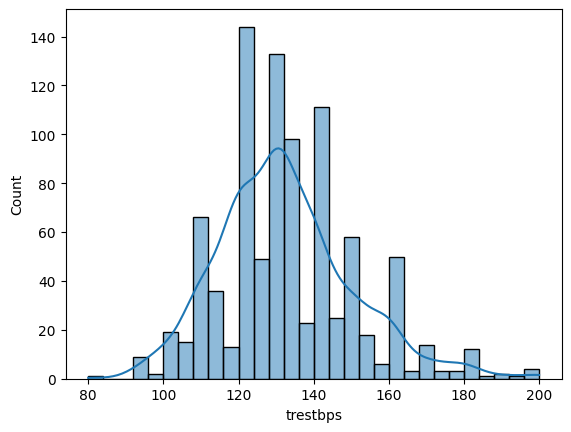

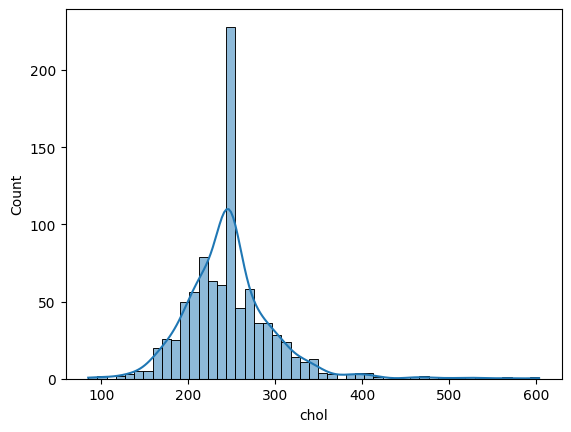

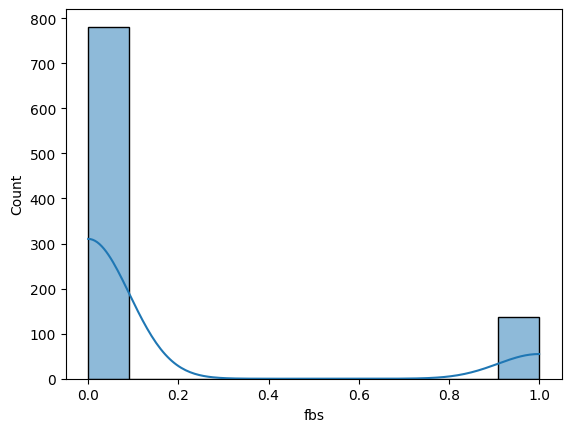

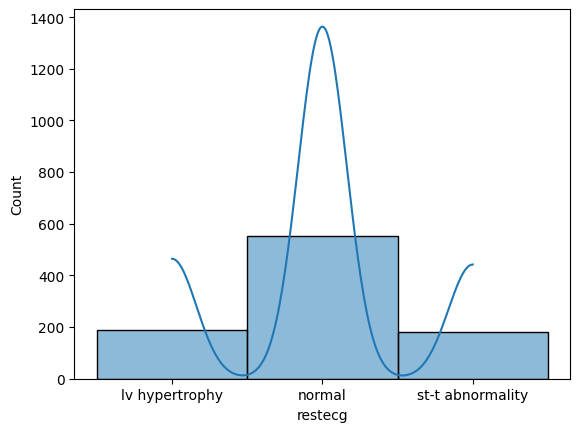

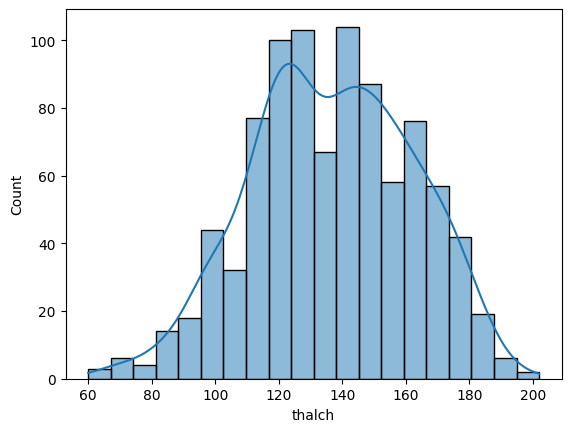

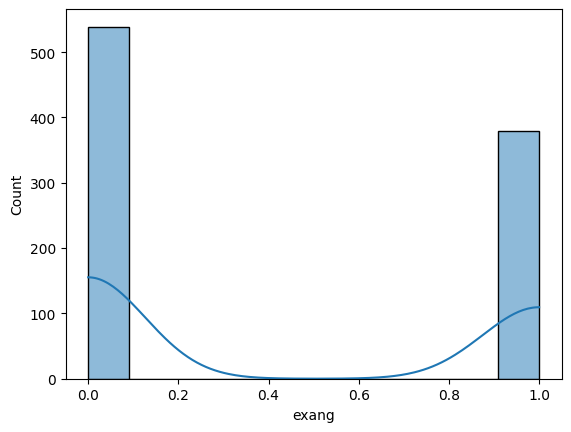

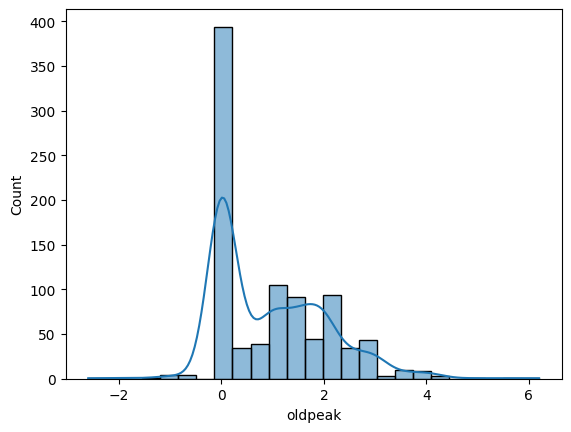

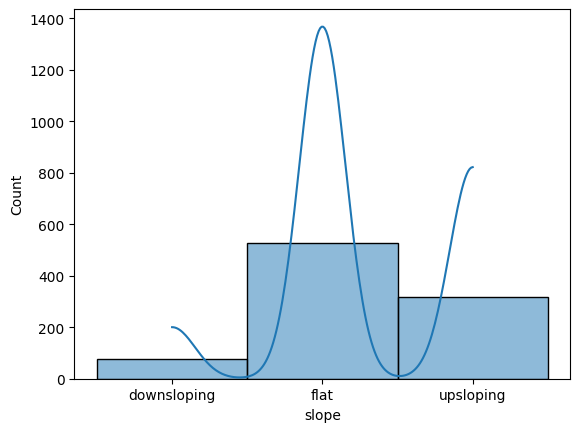

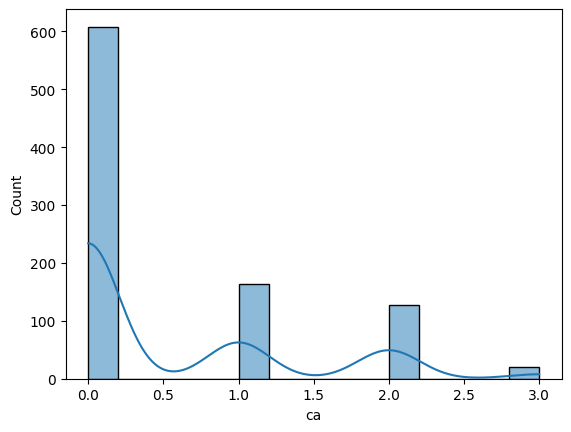

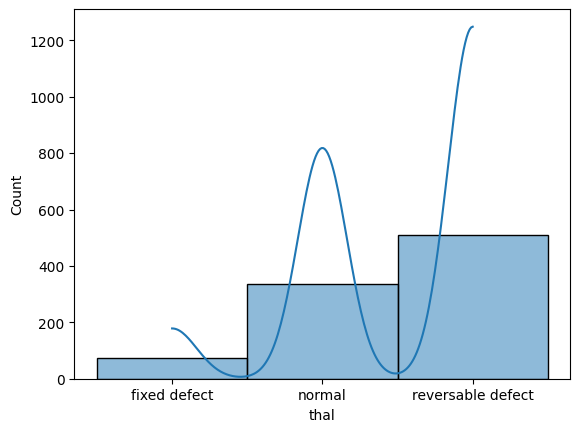

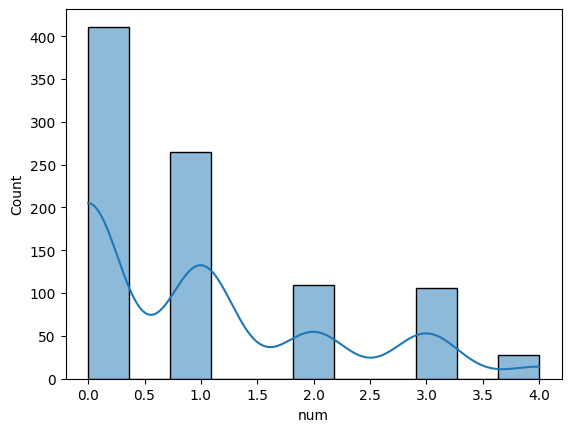

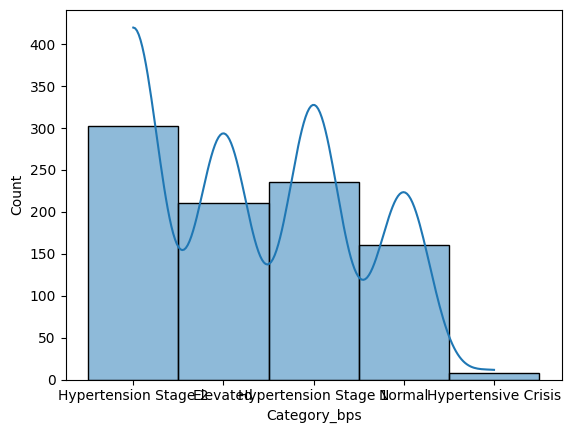

In [60]:
# create histograms for all columns

for col in df.columns:
    sns.histplot(df[col],kde=True)
    plt.show()

In [61]:
from sklearn.preprocessing import Normalizer
normalizer=Normalizer(norm='l2')

print(normalizer.fit_transform(X))

[[0.00313413 0.19745017 0.00313413 ... 0.         0.         0.00626826]
 [0.00568944 0.19059624 0.00284472 ... 0.00853416 0.00284472 0.00568944]
 [0.01011313 0.22585983 0.00337104 ... 0.00674208 0.00674208 0.        ]
 ...
 [0.9568846  0.05732969 0.00104236 ... 0.         0.         0.        ]
 [0.90691621 0.05723737 0.00098685 ... 0.         0.0019737  0.00098685]
 [0.95000675 0.06402219 0.00103262 ... 0.         0.00206523 0.        ]]


# Transformation

---

Enlist all the models that you will use to predict the heart disease. These models should be classifiers for multi-class classification.

1. logistic regression
2. KNN
3. NB
4. SVM
5. Decision Tree
6. Random Forest
7. XGBoost
8. GradientBoosting
9. AdaBoost
10. lightGBM

In [62]:
# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [63]:
# split the data into X and y
X = df.drop('num', axis=1)
y = df['num']

# encode X data using separate label encoder for all categorical columns and save it for inverse transform
# Task: Separate Encoder for all cat and object columns and inverse transform at the end

label_encoder = LabelEncoder()

for col in X.columns:
    if X[col].dtype == 'object' or X[col].dtype == 'category':
        X[col] = label_encoder.fit_transform(X[col])
    else:
        pass

# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [64]:
# Train a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Assume X is your feature DataFrame
# X = X.drop(columns=['id'])  # Drop 'id' since it's not useful
# Get feature importance scores
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
selected_features = feature_importances.nlargest(8).index.tolist()  # Convert to list

# Print selected features
print("Selected Features:", selected_features)

# Create a new DataFrame with selected features
X_selected = X[selected_features]


# lets' use selected features to train the model
X=X_selected


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# shpae of train and test data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


# train 

Selected Features: ['id', 'ca', 'thalch', 'oldpeak', 'age', 'trestbps', 'cp', 'chol']
(735, 8)
(184, 8)
(735,)
(184,)


In [65]:
X.head()

,id,ca,thalch,oldpeak,age,trestbps,cp,chol
0,1,0.0,150.0,2.3,63,145.0,3,233.0
1,2,3.0,108.0,1.5,67,160.0,0,286.0
2,3,2.0,129.0,2.6,67,120.0,0,229.0
3,4,0.0,187.0,3.5,37,130.0,2,250.0
4,5,0.0,172.0,1.4,41,130.0,1,204.0


In [66]:
# import all models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
# from lightgbm import LGBMClassifier

# impot pipeline
from sklearn.pipeline import Pipeline

# import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [67]:
# Create a list of models to evaluate
models = [('Random Forest', RandomForestClassifier(random_state=42,n_estimators=200, max_depth=4,criterion='entropy',bootstrap=False)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('Support Vector Machine', SVC(random_state=42)),
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Ada Boost', AdaBoostClassifier(random_state=42)),
    ('XG Boost', XGBClassifier(random_state=42)),
    ('Naive Bayes', GaussianNB())
]

best_model = None
best_accuracy = 0.0

# Iterate over the models and evaluate their performance
for name, model in models:
    # Create a pipeline for each model
    pipeline = Pipeline([
        # ('imputer', SimpleImputer(strategy='most_frequent')),
        # ('encoder', OneHotEncoder(handle_unknown='ignore')),
        ('model', model)
    ])
    
    # Perform cross-validation
    scores = cross_val_score(pipeline, X_train, y_train, cv=5)
    
    # Calculate mean accuracy
    mean_accuracy = scores.mean()
    
    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = pipeline.predict(X_test)
    
    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    
    # Print the performance metrics
    print("Model:", name)
    print("Cross-validation Accuracy:", mean_accuracy)
    print("Test Accuracy:", accuracy)
    print()
    
    # Check if the current model has the best accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline

# Retrieve the best model
print("Best Model:", best_model)

# save the best model
import pickle
pickle.dump(best_model, open('heart_disease_model.pkl', 'wb'))

Model: Random Forest
Cross-validation Accuracy: 0.691156462585034
Test Accuracy: 0.6847826086956522

Model: Gradient Boosting
Cross-validation Accuracy: 0.6612244897959183
Test Accuracy: 0.7010869565217391

Model: Support Vector Machine
Cross-validation Accuracy: 0.5850340136054422
Test Accuracy: 0.5815217391304348

Model: Logistic Regression
Cross-validation Accuracy: 0.5292517006802722
Test Accuracy: 0.483695652173913

Model: K-Nearest Neighbors
Cross-validation Accuracy: 0.5809523809523809
Test Accuracy: 0.592391304347826

Model: Decision Tree
Cross-validation Accuracy: 0.6217687074829932
Test Accuracy: 0.6195652173913043

Model: Ada Boost
Cross-validation Accuracy: 0.6108843537414966
Test Accuracy: 0.592391304347826

Model: XG Boost
Cross-validation Accuracy: 0.6517006802721088
Test Accuracy: 0.6956521739130435

Model: Naive Bayes
Cross-validation Accuracy: 0.5768707482993197
Test Accuracy: 0.5706521739130435

Best Model: Pipeline(steps=[('model', GradientBoostingClassifier(random_